In [1]:
import matplotlib.pyplot as plt
import statsmodels.api as sm
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
import operator
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
def load_file(filename):
    lst = []
    with open(filename, 'r') as f:
        for line in f:
            lst.append(float(line))
    return lst

data = load_file('lexrate.txt')
print(len(data))

204


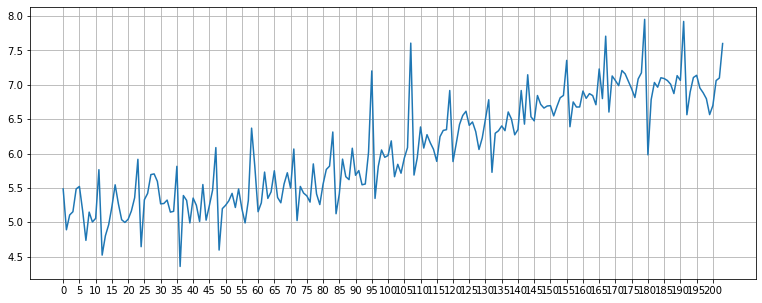

In [3]:
def show_plot(y, x_ticks):
 plt.figure(figsize=(13,5))
 plt.plot(y)
 plt.grid()
 plt.xticks(np.arange(0, len(y)+1, x_ticks))
 plt.show()
show_plot(data, 5)

In [4]:
test_df = adfuller(data, maxlag=None, regression='ct', autolag='t-stat', store=False, regresults=True)

In [5]:
print(f'ADF Statistic: {test_df[0]}')
print(f'p-value: {test_df[1]}')
print(f'critical values: {test_df[2]}')

ADF Statistic: -2.2376327449648072
p-value: 0.46870547426839926
critical values: {'1%': -4.006711675454599, '5%': -3.433608194523564, '10%': -3.1406263010660807}


In [6]:
test_df[3].__dict__['resols'].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.773
Model:                            OLS   Adj. R-squared:                  0.756
Method:                 Least Squares   F-statistic:                     46.53
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           3.09e-50
Time:                        22:06:23   Log-Likelihood:                -1.9103
No. Observations:                 192   AIC:                             31.82
Df Residuals:                     178   BIC:                             77.43
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.3409      0.152     -2.238      0.026      -0.641      -0.040
x2            -0.7000      0.148     -4.724      0.000      -0.992      -0.408
x3            -0.6417      0.148     -4.342      0.000      -0.933      -0.350
x4            -0.5170      0.149     -3.467      0.001      -0.811      -0.223
x5            -0.3630      0.149     -2.430      0.016      -0.658      -0.068
x6            -0.2378      0.147     -1.617      0.108      -0.528       0.052
x7            -0.1346      0.143     -0.942      0.347      -0.416       0.147
x8            -0.1416      0.136     -1.043      0.298      -0.410       0.126
x9            -0.2472      0.126     -1.966      0.051      -0.495       0.001
x10           -0.3939      0.110     -3.580      0.000      -0.611      -0.177
x11           -0.5388      0.087     -6.182      0.000      -0.711      -0.367
x12           -0.6446      0.057    -11.332      0.000      -0.757      -0.532
const          1.7256      0.745      2.315      0.022       0.255       3.197
x13            0.0042      0.002      2.254      0.025       0.001       0.008
==============================================================================
Omnibus:                        9.186   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.010   Jarque-Bera (JB):               14.870
Skew:                           0.231   Prob(JB):                     0.000590
Kurtosis:                       4.283   Cond. No.                     4.95e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.95e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [13]:
diff_data = np.array(pd.Series(data).diff().dropna())
test_diff = adfuller(diff_data, maxlag=None, regression='ct', regresults=True)
print(f'ADF Statistic: {test_diff[0]}')
print(f'p-value: {test_diff[1]}')
print(f'critical values: {test_diff[2]}')
test_diff[3].__dict__["resols"].summary()

ADF Statistic: -9.923017379177855
p-value: 3.3632011674524744e-15
critical values: {'1%': -4.006711675454599, '5%': -3.433608194523564, '10%': -3.1406263010660807}


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.923
Model:                            OLS   Adj. R-squared:                  0.918
Method:                 Least Squares   F-statistic:                     179.5
Date:                Sun, 18 Apr 2021   Prob (F-statistic):           5.92e-93
Time:                        22:14:08   Log-Likelihood:                -4.5734
No. Observations:                 192   AIC:                             35.15
Df Residuals:                     179   BIC:                             77.49
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -7.4444      0.750     -9.923      0.000      -8.925      -5.964
x2             5.4365      0.734      7.410      0.000       3.989       6.884
x3             4.5195      0.700      6.453      0.000       3.137       5.902
x4             3.7571      0.651      5.770      0.000       2.472       5.042
x5             3.1752      0.587      5.411      0.000       2.017       4.333
x6             2.7437      0.508      5.404      0.000       1.742       3.746
x7             2.4388      0.416      5.869      0.000       1.619       3.259
x8             2.1494      0.317      6.771      0.000       1.523       2.776
x9             1.7776      0.220      8.096      0.000       1.344       2.211
x10            1.2856      0.129      9.938      0.000       1.030       1.541
x11            0.6788      0.055     12.252      0.000       0.569       0.788
const          0.0596      0.038      1.575      0.117      -0.015       0.134
x12         9.732e-05      0.000      0.291      0.772      -0.001       0.001
==============================================================================
Omnibus:                       13.185   Durbin-Watson:                   1.807
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               30.022
Skew:                           0.217   Prob(JB):                     3.03e-07
Kurtosis:                       4.888   Cond. No.                     9.98e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.98e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""